THE FOLLOWING NOTEBOOK WAS CREATED FOR THE KAGGLE MACHINELEARNING TITANIC CHALENGE AS PERSONAL TRAINING, IT CONTAINS ONLY THE MINIMUM REQUIRED TO RUN THE MODEL. IF TIME ALLOWS IT, A PRESENTABLE VERSION OF THE EXPLORATORY ANALYSIS NOTEBOOK USED FOR THE SAME DATA WILL IN THE FUTURE PRESENTED

Basic Libraries Import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Monting Drive Contaning Filles

In [57]:
from google.colab import drive 
drive.mount('/content/drive')
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS
dfTrain = pd.read_csv('PYDATASCI/TITANIC/train.csv')
dfTest = pd.read_csv('PYDATASCI/TITANIC/test.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PROGRAMAS
/content/drive/My Drive/PROGRAMAS


Inicial Aproach to understand the data involved

In [58]:
print(dfTrain.dtypes) 
print("###################################################################")
print(dfTrain.describe()) 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
###################################################################
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

           

Here we create a single variable called relatives to concatenate SibSp(siblings) and Parch(parents and children). This helps the optimization of the model while not affecting the results (as tested through trial in a previous notebook version).

In [59]:
dfTrain["Relatives"]=dfTrain['SibSp']+dfTrain["Parch"] 

dfTest["Relatives"]=dfTest['SibSp']+dfTest["Parch"]

dfTrain2 = dfTrain.copy()
dfTrain2.drop("Parch", axis=1, inplace=True)

dfTest2 = dfTest.copy()
dfTest2.drop("Parch", axis=1, inplace=True)

Creating lists separanting quantitative from qualitative variables of our data set

In [60]:
qlTrain2 = []
qtTrain2 = []

for i in dfTrain2.dtypes.index:
    if dfTrain2.dtypes[i] == 'object':
        qlTrain2.append(i)
    else:
        qtTrain2.append(i)
print('Quantitative Variables: ',qtTrain2)
print('Qualitative Variables: ',qlTrain2)
dfqt=dfTrain2[qtTrain2]
dfql=dfTrain2[qlTrain2]


Quantitative Variables:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'Relatives']
Qualitative Variables:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Here we fill Age NaN's based on random values selected in a range of mean's and std's of said means. To establish these values, since a corelation of Number of Siblings abord was observed with the age variable. We define mean's and std of ages correcponding to each entre o SibSp (0-5), and fill the age NaN's with the corresponding mean+-std.


In [61]:

#Prepares new list contaning age values for each possible entry of SibSp:

Sib0=[]
Sib1=[]
Sib2=[]
Sib3=[]
Sib4=[]
Sib5=[]
Sib8=[]

for i in range(0,len(dfTrain2.SibSp)):

  if dfTrain2.SibSp[i] == 0 and np.isnan(dfTrain2.Age[i]) != True:
      Sib0.append(dfTrain2.Age[i])

  if dfTrain2.SibSp[i] == 1 and np.isnan(dfTrain2.Age[i]) != True:
      Sib1.append(dfTrain2.Age[i])
  
  if dfTrain2.SibSp[i] == 2 and np.isnan(dfTrain2.Age[i]) != True:
      Sib2.append(dfTrain2.Age[i])

  if dfTrain2.SibSp[i] == 3 and np.isnan(dfTrain2.Age[i]) != True:
      Sib3.append(dfTrain2.Age[i])

  if dfTrain2.SibSp[i] == 4 and np.isnan(dfTrain2.Age[i]) != True:
      Sib4.append(dfTrain2.Age[i])

  if dfTrain2.SibSp[i] == 5 and np.isnan(dfTrain2.Age[i]) != True:
      Sib5.append(dfTrain2.Age[i])

Sibdf0=pd.DataFrame()
Sibdf1=pd.DataFrame()
Sibdf2=pd.DataFrame()
Sibdf3=pd.DataFrame()
Sibdf4=pd.DataFrame()
Sibdf5=pd.DataFrame()

Sibdf0["Sib"]=Sib0
Sibdf1["Sib"]=Sib1
Sibdf2["Sib"]=Sib2
Sibdf3["Sib"]=Sib3
Sibdf4["Sib"]=Sib4
Sibdf5["Sib"]=Sib5

#Established the mean and std of each sublist of Age:

meanTrainTotal = dfTrain["Age"].mean()
stdTrainTotal = dfTrain["Age"].std()

meanTrain0 = Sibdf0["Sib"].mean()
stdTrain0 = Sibdf0["Sib"].std()

meanTrain1 = Sibdf1["Sib"].mean()
stdTrain1 = Sibdf1["Sib"].std()

meanTrain2 = Sibdf2["Sib"].mean()
stdTrain2 = Sibdf2["Sib"].std()

meanTrain3 = Sibdf3["Sib"].mean()
stdTrain3 = Sibdf3["Sib"].std()

meanTrain4 = Sibdf4["Sib"].mean()
stdTrain4 = Sibdf4["Sib"].std()

meanTrain5 = Sibdf5["Sib"].mean()
stdTrain5 = Sibdf5["Sib"].std()

#Fill's NaN's with the mean+-std corresponding to the line value of SibSp:

import random

rand_age_TrainTotal = np.random.randint(meanTrainTotal - stdTrainTotal, meanTrainTotal + stdTrainTotal)

rand_age_Train0 = np.random.randint(meanTrain0 - stdTrain0, meanTrain0 + stdTrain0)

rand_age_Train1 = np.random.randint(meanTrain1 - stdTrain1, meanTrain1 + stdTrain1)

rand_age_Train2 = np.random.randint(meanTrain2 - stdTrain2, meanTrain2 + stdTrain2)

rand_age_Train3 = np.random.randint(meanTrain3 - stdTrain3, meanTrain3 + stdTrain3)

rand_age_Train4 = np.random.randint(meanTrain4 - stdTrain4, meanTrain4 + stdTrain4)

rand_age_Train5 = np.random.randint(meanTrain5 - stdTrain5, meanTrain5 + stdTrain5)

dfTrain3 = dfTrain2.dropna(subset=['Embarked'])

for i in range(0,len(dfTrain3.Age)):
  try:
    if np.isnan(dfTrain3.Age[i]) == True and dfTrain3.SibSp[i]==0:

      dfTrain3.Age[i]= rand_age_Train0
  
    if np.isnan(dfTrain3.Age[i]) == True and dfTrain3.SibSp[i]==1:

      dfTrain3.Age[i]= rand_age_Train1

    if np.isnan(dfTrain3.Age[i]) == True and dfTrain3.SibSp[i]==2:

      dfTrain3.Age[i]= rand_age_Train2
  
    if np.isnan(dfTrain3.Age[i]) == True and dfTrain3.SibSp[i]==3:

      dfTrain3.Age[i]= rand_age_Train3
  
    if np.isnan(dfTrain3.Age[i]) == True and dfTrain3.SibSp[i]==4:

      dfTrain3.Age[i]= rand_age_Train4

    if np.isnan(dfTrain3.Age[i]) == True and dfTrain3.SibSp[i]==5:

      dfTrain3.Age[i]= rand_age_Train5
  
    if np.isnan(dfTrain3.Age[i]) == True and dfTrain3.SibSp[i]!=0 and dfTrain3.SibSp[i]!=1 and dfTrain3.SibSp[i]!=2 and dfTrain3.SibSp[i]!=3 and dfTrain3.SibSp[i]!=4 and dfTrain3.SibSp[i]!=5:

      dfTrain3.Age[i]= rand_age_TrainTotal

  except:
      dfTrain3.Age[i]= rand_age_TrainTotal
      
dfTrain3["Age"] = dfTrain3["Age"].astype(int)


dfTest3 = dfTest2.dropna(subset=['Embarked'])



#Sabe NaN's Filling in test data:

for i in range(0,len(dfTest3.Age)):
  try:
    if np.isnan(dfTest3.Age[i]) == True and dfTest3.SibSp[i]==0:

      dfTest3.Age[i]= rand_age_Train0
      
    if np.isnan(dfTest3.Age[i]) == True and dfTest3.SibSp[i]==1:

      dfTest3.Age[i]= rand_age_Train1

    if np.isnan(dfTest3.Age[i]) == True and dfTest3.SibSp[i]==2:

      dfTest3.Age[i]= rand_age_Train2
  
    if np.isnan(dfTest3.Age[i]) == True and dfTest3.SibSp[i]==3:

      dfTest3.Age[i]= rand_age_Train3
  
    if np.isnan(dfTest3.Age[i]) == True and dfTest3.SibSp[i]==4:

      dfTest3.Age[i]= rand_age_Train4

    if np.isnan(dfTest3.Age[i]) == True and dfTest3.SibSp[i]==5:

      dfTest3.Age[i]= rand_age_Train5
  
    if np.isnan(dfTest3.Age[i]) == True and dfTest3.SibSp[i]!=0 and dfTest3.SibSp[i]!=1 and dfTest3.SibSp[i]!=2 and dfTest3.SibSp[i]!=3 and dfTest3.SibSp[i]!=4 and dfTest3.SibSp[i]!=5:

      dfTest3.Age[i]= rand_age_TrainTotal

  except:
      dfTest3.Age[i]= rand_age_TrainTotal

dfTest3["Age"] = dfTest3["Age"].astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to

Here, the NaN's from fare are filled with the mean+-std (from the train data) of the existing Fare Values (only the test data had NaN is this category), without further steps as the number of NaN's was small compared to the total data. The SibSp data is dropped as it serves no further use, as the Cabin data is also droped due to a far to great lack of entries.

In [62]:

meanTest = dfTrain["Fare"].mean()
stdTest = dfTrain["Fare"].std()

rand_Fare_Train = np.random.randint(meanTest - stdTest, meanTest + stdTest)


Fare_Filled = dfTest3["Fare"].copy()
Fare_Filled[np.isnan(Fare_Filled)] = rand_Fare_Train
dfTest3["Fare"] = Fare_Filled
dfTest3["Fare"] = dfTest3["Fare"].astype(int)


dfTrain4 = dfTrain3.copy() 
dfTest4 = dfTest3.copy() 
dfTrain4.drop("SibSp", axis=1, inplace=True)
dfTest4.drop("SibSp", axis=1, inplace=True)
####################################################################

dfTrain4.drop("Cabin",axis=1,inplace=True)
ListNames=[]

for i in dfTrain4.Name:
  sep = ' '
  SobreNome=sep = i.split(sep, 1)[0]
  ListNames.append(SobreNome)
dfTrain4.Name=ListNames

####################################################################

dfTest4.drop("Cabin",axis=1,inplace=True)
ListNames=[]

for i in dfTest4.Name:
  sep = ' '
  SobreNome=sep = i.split(sep, 1)[0]
  ListNames.append(SobreNome)
dfTest4.Name=ListNames

Detect Outliers in proportion to the total data in each column, Cap's the outliers at 87% (for full removal) e Explicit the results after Outlier Caping for Verification

Out lier before capping
      Variable  Outliers  Percentile
0  PassengerId         0    0.000000
1     Survived         0    0.000000
2       Pclass         0    0.000000
3          Age         7    0.787402
4         Fare       114   12.823397
5    Relatives        91   10.236220
########################
Out lier after capping
      Variable  Outliers  Percentile
0  PassengerId         0    0.000000
1     Survived         0    0.000000
2       Pclass         0    0.000000
3          Age         0    0.000000
4         Fare       114   12.823397
5    Relatives         0    0.000000


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'boxes': [<matplotlib.lines.Line2D at 0x7fab24358590>],
 'caps': [<matplotlib.lines.Line2D at 0x7fab243615d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab2436a610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fab2436a0d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fab24358b10>,
  <matplotlib.lines.Line2D at 0x7fab24361090>]}

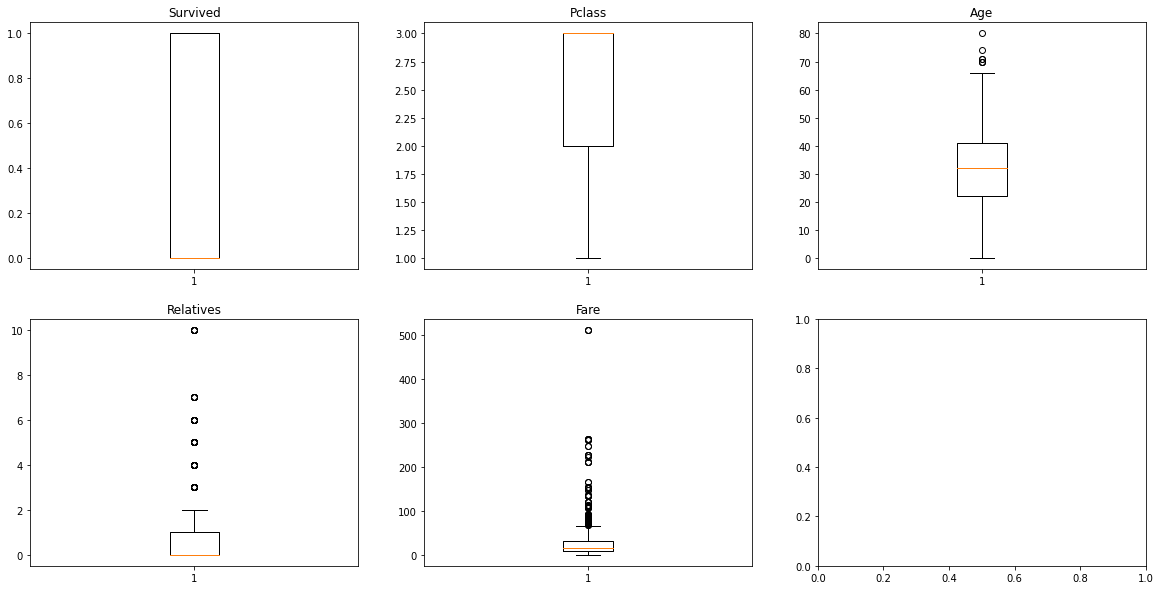

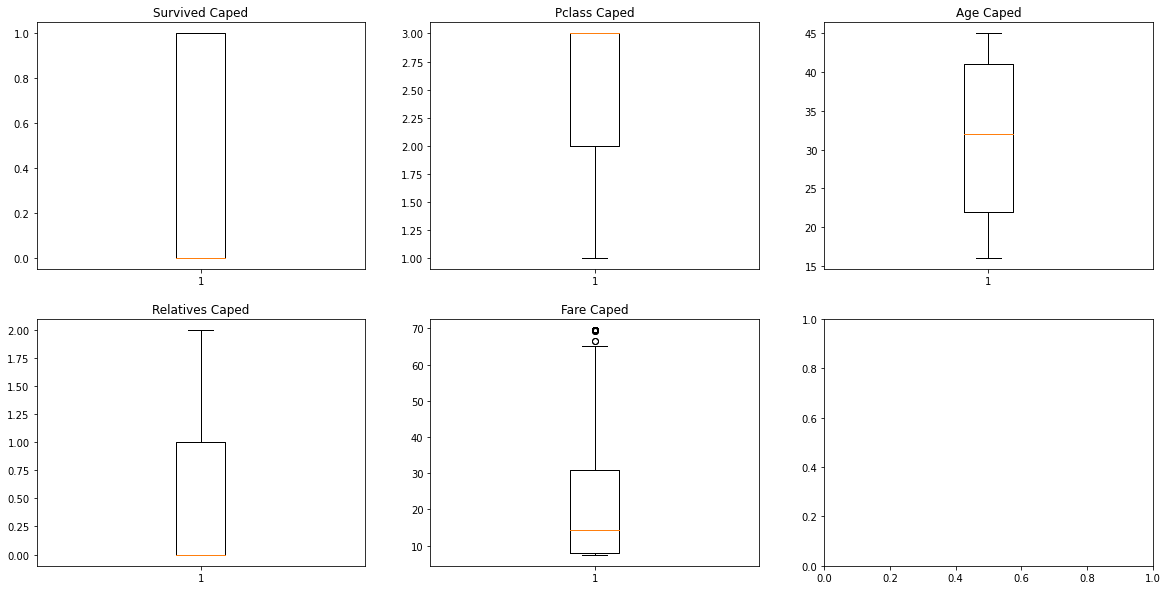

In [63]:
# OUTLIERS PreCaping
fig, axs = plt.subplots(2,3,figsize=(20,10)) 

axs[0,0].set_title('Survived')
axs[0,0].boxplot(dfTrain4.Survived)

axs[0,1].set_title('Pclass')
axs[0,1].boxplot(dfTrain4.Pclass)

axs[0,2].set_title('Age')
axs[0,2].boxplot(dfTrain4.Age)

axs[1,0].set_title('Relatives')
axs[1,0].boxplot(dfTrain4.Relatives)

axs[1,1].set_title('Fare')
axs[1,1].boxplot(dfTrain4.Fare)

try:
  qtTrain2.remove('SibSp')
except:
  pass
dfTrain_qt = dfTrain4[qtTrain2]
colunas = dfTrain_qt.columns
outliers = []

for i in dfTrain_qt.columns:
    
    q3 = np.quantile(dfTrain_qt[i], 0.75)
    q1 = np.quantile(dfTrain_qt[i], 0.25)
    dist = q3 - q1 
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
     
    outlier = 0

    for j in dfTrain_qt.index:
        if dfTrain_qt[i][j] < lim_inf:
            outlier = outlier + 1
        elif dfTrain_qt[i][j] > lim_sup:
            outlier= outlier + 1
        else: 
            pass
        
    outliers.append(outlier)
    
df_outlier = pd.DataFrame()
df_outlier['Variable'] = colunas
df_outlier['Outliers'] = outliers
df_outlier['Percentile'] = (outliers/dfTrain_qt.PassengerId.count()) * 100

print("Out lier before capping")
print(df_outlier)
print("########################")
############################################################
#Caping

dfTrain5=dfTrain4.copy()
Id=dfTrain4.PassengerId

dfTrain5.drop("PassengerId", axis=1, inplace=True)
dfTrain_qt.drop("PassengerId", axis=1, inplace=True)
for i in dfTrain_qt.columns:
    percentiles = dfTrain5[i].quantile([0.1, 0.88]).values
    dfTrain5[i][dfTrain5[i] <= percentiles[0]] = percentiles[0]
    dfTrain5[i][dfTrain5[i] >= percentiles[1]] = percentiles[1]

dfTrain5["PassengerId"]=Id
###########################################################3
# OUTLIERS Pos Caping
dfTrain_qt = dfTrain5[qtTrain2]
colunas = dfTrain_qt.columns
outliers = []

for i in dfTrain_qt.columns:
    
    q3 = np.quantile(dfTrain_qt[i], 0.75)
    q1 = np.quantile(dfTrain_qt[i], 0.25)
    dist = q3 - q1 
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
     
    outlier = 0

    for j in dfTrain_qt.index:
        if dfTrain_qt[i][j] < lim_inf:
            outlier = outlier + 1
        elif dfTrain_qt[i][j] > lim_sup:
            outlier= outlier + 1
        else: 
            pass
        
    outliers.append(outlier)
    
df_outlier = pd.DataFrame()
df_outlier['Variable'] = colunas
df_outlier['Outliers'] = outliers
df_outlier['Percentile'] = (outliers/dfTrain_qt.PassengerId.count()) * 100

print('Out lier after capping')
print (df_outlier)

fig, axs = plt.subplots(2,3,figsize=(20,10)) 

axs[0,0].set_title('Survived Caped')
axs[0,0].boxplot(dfTrain5.Survived)

axs[0,1].set_title('Pclass Caped')
axs[0,1].boxplot(dfTrain5.Pclass)

axs[0,2].set_title('Age Caped')
axs[0,2].boxplot(dfTrain5.Age)

axs[1,0].set_title('Relatives Caped')
axs[1,0].boxplot(dfTrain5.Relatives)

axs[1,1].set_title('Fare Caped')
axs[1,1].boxplot(dfTrain5.Fare)

Extablishing the dummies for categorical values of DataSet

In [64]:
dfTestSave=dfTest5.copy()
dummytrain=pd.get_dummies(dfTrain5)
dummytest=pd.get_dummies(dfTest5)

Fills Test Dummie with lacking columns in regard of Train Dummies

In [65]:

missing_cols = set( dummytrain.columns ) - set( dummytest.columns )

for i in missing_cols:
    dummytest[i] = 0

dummytest = dummytest[dummytrain.columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


Establishes and separates the variable of interess (Survived), rescale other variables and drop's passenger Id to not interfere with the model (in the final result passenger Id is Brought Back)

In [66]:
x_train = dummytrain.drop('Survived', axis = 1)
x_train = x_train.drop('PassengerId', axis = 1)
y_train = dummytrain.Survived


Id=dummytest.PassengerId
x_test = dummytest.drop('PassengerId', axis = 1)
x_test = x_test.drop('Survived', axis = 1)


from sklearn.preprocessing import StandardScaler # escalando os dados antes testar

scaler = StandardScaler()

xtrain_scaled = scaler.fit_transform(x_train)
xtrain_scaled = pd.DataFrame(xtrain_scaled, columns=(x_train.columns))

xtest_scaled = scaler.fit_transform(x_test)
xtest_scaled = pd.DataFrame(xtest_scaled, columns=(x_test.columns))

#xtrain_scaled    


Applies The Model, The model Chosen was a logistic Regression due to:
 [1]Good Performance when compare with linear regression, Randomn Forest, XGBoost, Gradient Boost.
 [2]The variable of Interest being boolean in nature, makes logistic regression an often good choice. 

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelo = LogisticRegression()

modelo.fit(xtrain_scaled, y_train)

y_pred = modelo.predict(xtest_scaled)



Saves the test results as a csv

In [68]:
import csv

Resultado=pd.DataFrame()
Resultado["PassengerId"]=Id
Resultado["Survived"]=y_pred

Resultado = Resultado.assign(Index=Resultado.PassengerId).set_index('PassengerId') #Established passengerId as the index 
Resultado = Resultado.drop('Index', axis=1)
Resultado.to_csv('PYDATASCI/TITANIC/Resultado.csv')